## LOGISTIC REGRESSION

#### 1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

#### 2. Do the same analysis for other columns

#### 3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

#### 4. Plot ROC Curves for each model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

glass_df = pd.read_csv('/Users/nikitaakenkre/Downloads/glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [2]:
glass_df.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [3]:
glass_df['household'] = glass_df.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass_df.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'glass_df'
numerical_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
glass_df[numerical_columns] = scaler.fit_transform(glass_df[numerical_columns])

# Now, 'glass_df' contains standardized values for the numerical columns


In [5]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1,0
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1,0
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1,0
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1,0
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7,1
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7,1
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7,1
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7,1


### Using Al

In [6]:
glass_df.sort_values( by = 'Al', inplace=True)
X= np.array(glass_df.Al).reshape(-1,1)
y = glass_df.household

In [7]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[1.89376177]]), array([-1.61374073]))

Text(0, 0.5, 'household')

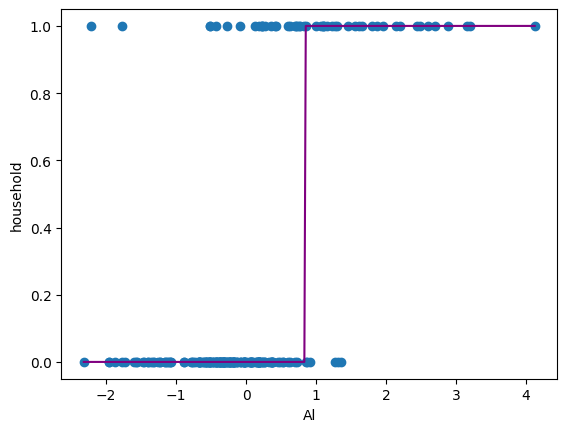

In [8]:
glass_df.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.Al, glass_df.household)
plt.plot(glass_df.Al, pred, color='purple')
plt.xlabel('Al')
plt.ylabel('household')

In [9]:
logreg.predict_proba(X)[:15]

array([[0.99753881, 0.00246119],
       [0.99702505, 0.00297495],
       [0.99513249, 0.00486751],
       [0.99513249, 0.00486751],
       [0.99433753, 0.00566247],
       [0.99316009, 0.00683991],
       [0.99316009, 0.00683991],
       [0.99262369, 0.00737631],
       [0.99039616, 0.00960384],
       [0.9900277 , 0.0099723 ],
       [0.98964526, 0.01035474],
       [0.98796495, 0.01203505],
       [0.9875044 , 0.0124956 ],
       [0.98601582, 0.01398418],
       [0.98601582, 0.01398418]])

In [10]:
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]

Text(0, 0.5, 'household')

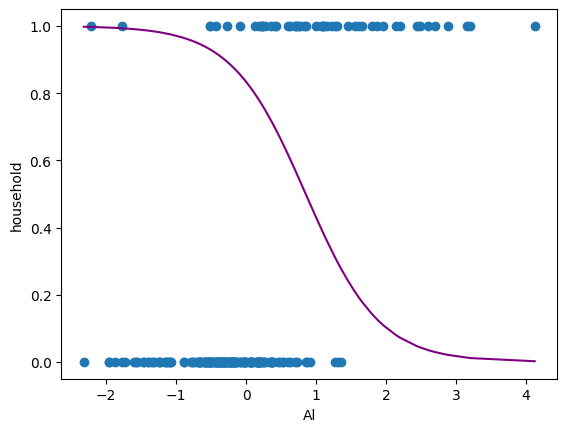

In [11]:
# Plot the predicted probabilities.
plt.scatter(glass_df.Al, glass_df.household)
plt.plot(glass_df.Al, glass_df.household_pred_prob, color='purple')
plt.xlabel('Al')
plt.ylabel('household')

In [12]:
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[157,   6],
       [ 24,  27]])

In [13]:
Accuracy_Al = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_Al))

Precision_Al = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_Al))

Recall_Al = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_Al))

Accuracy of the model with 0.5 threshold is 0.85981
Precision of the model with 0.5 threshold is 0.81818
Recall of the model with 0.5 threshold is 0.52941


In [14]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_Al,
                     'Precision': Precision_Al,
                     'Recall': Recall_Al})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)


   Threshold  Accuracy  Precision    Recall
0        0.5  0.859813   0.818182  0.529412
1        0.1  0.598131   0.362205  0.901961
2        0.2  0.785047   0.530120  0.862745
3        0.3  0.869159   0.725490  0.725490
4        0.4  0.878505   0.804878  0.647059
5        0.6  0.864486   0.892857  0.490196
6        0.7  0.831776   0.894737  0.333333
7        0.8  0.831776   1.000000  0.294118
8        0.9  0.808411   1.000000  0.196078


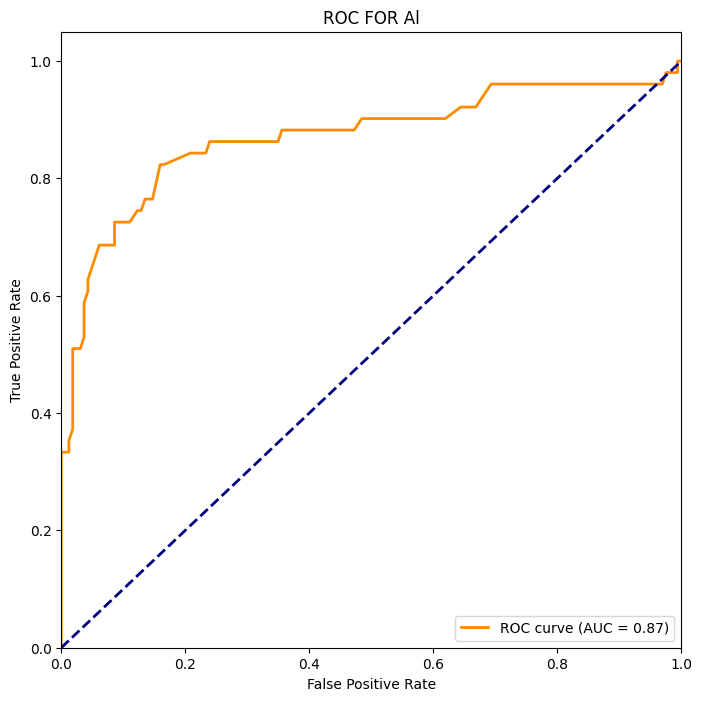

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR Al')
plt.legend(loc='lower right')
plt.show()

### Using Na

In [16]:
glass_df.sort_values( by = 'Na', inplace=True)
X= np.array(glass_df.Na).reshape(-1,1)
y = glass_df.household

In [17]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[1.29461152]]), array([-1.45760582]))

Text(0, 0.5, 'household')

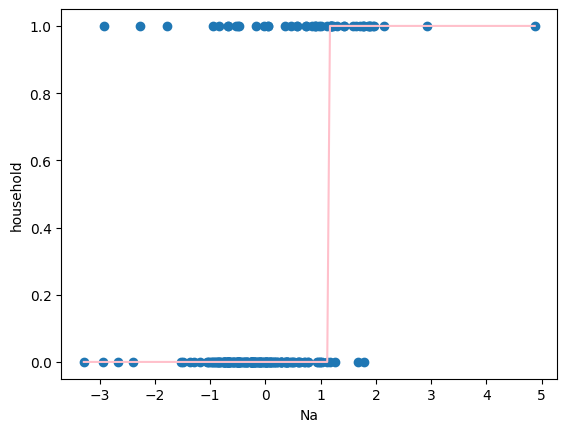

In [18]:
glass_df.sort_values( by = 'Na', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.Na, glass_df.household)
plt.plot(glass_df.Na, pred, color='pink')
plt.xlabel('Na')
plt.ylabel('household')

In [19]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]

Text(0, 0.5, 'household')

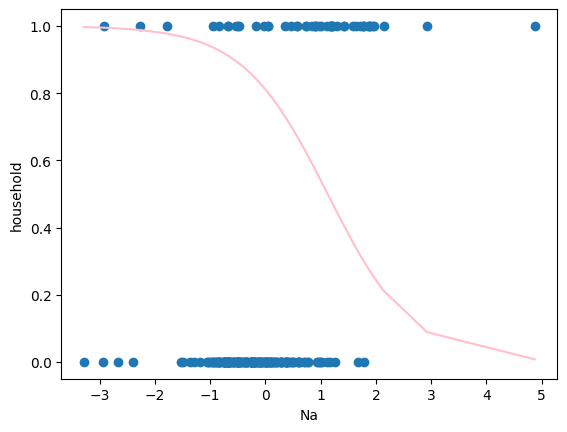

In [20]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]
# Plot the predicted probabilities.
plt.scatter(glass_df.Na, glass_df.household)
plt.plot(glass_df.Na, glass_df.household_pred_prob, color='pink')
plt.xlabel('Na')
plt.ylabel('household')

In [21]:
cm_Na = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm_Na

array([[159,   4],
       [ 27,  24]])

In [22]:
Accuracy_Na = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_Na))

Precision_Na = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_Na))

Recall_Na = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_Na))

Accuracy of the model with 0.5 threshold is 0.85514
Precision of the model with 0.5 threshold is 0.85714
Recall of the model with 0.5 threshold is 0.47059


In [23]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_Na,
                     'Precision': Precision_Na,
                     'Recall': Recall_Na})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)


   Threshold  Accuracy  Precision    Recall
0        0.5  0.855140   0.857143  0.470588
1        0.1  0.443925   0.282051  0.862745
2        0.2  0.710280   0.435294  0.725490
3        0.3  0.827103   0.625000  0.686275
4        0.4  0.859813   0.756098  0.607843
5        0.6  0.822430   0.882353  0.294118
6        0.7  0.803738   0.909091  0.196078
7        0.8  0.771028   1.000000  0.039216
8        0.9  0.771028   1.000000  0.039216


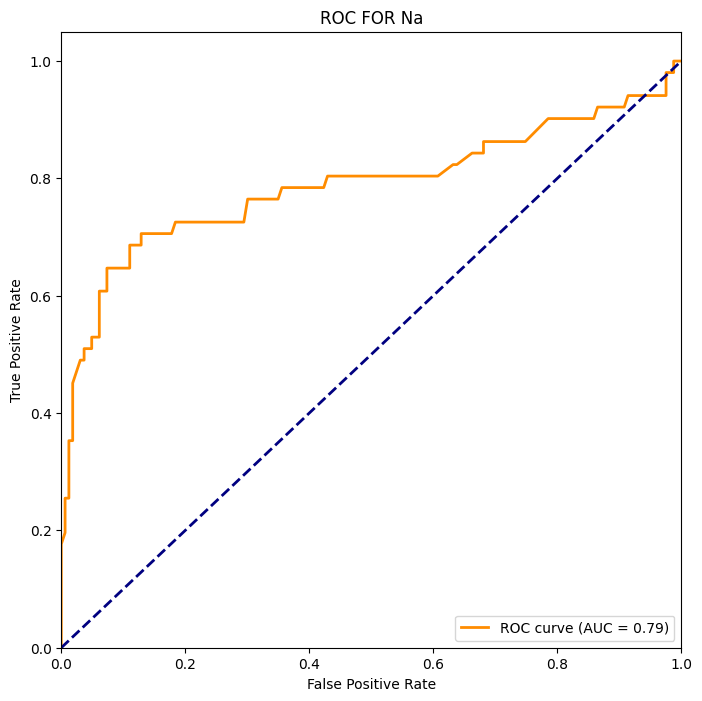

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR Na')
plt.legend(loc='lower right')
plt.show()

### Using RI

In [25]:
glass_df.sort_values( by = 'RI', inplace=True)
X= np.array(glass_df.RI).reshape(-1,1)
y = glass_df.household

In [26]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[-0.36496617]]), array([-1.19563083]))

Text(0, 0.5, 'household')

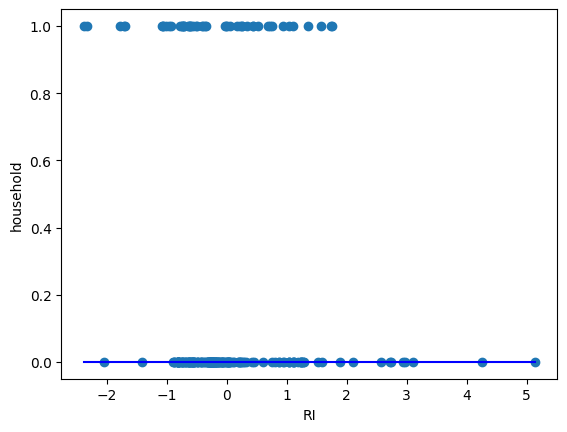

In [27]:
glass_df.sort_values( by = 'RI', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.RI, glass_df.household)
plt.plot(glass_df.RI, pred, color='Blue')
plt.xlabel('RI')
plt.ylabel('household')

In [28]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]

Text(0, 0.5, 'household')

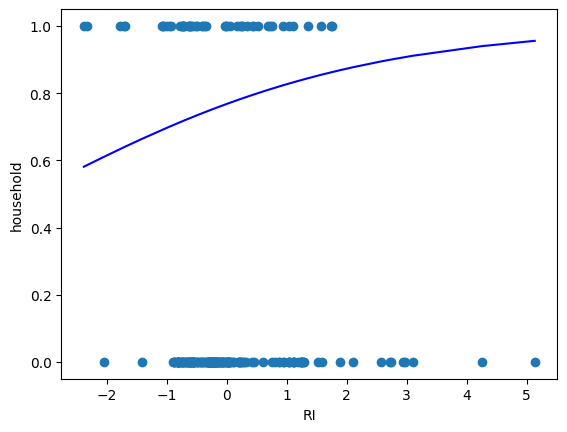

In [29]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]
# Plot the predicted probabilities.
plt.scatter(glass_df.RI, glass_df.household)
plt.plot(glass_df.RI, glass_df.household_pred_prob, color='Blue')
plt.xlabel('RI')
plt.ylabel('household')

In [30]:
cm_RI = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm_RI

array([[163,   0],
       [ 51,   0]])

In [31]:
Accuracy_RI = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_RI))

Precision_RI = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_RI))

Recall_RI = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_RI))

Accuracy of the model with 0.5 threshold is 0.76168
Precision of the model with 0.5 threshold is 0.00000
Recall of the model with 0.5 threshold is 0.00000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_RI,
                     'Precision': Precision_RI,
                     'Recall': Recall_RI})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)


   Threshold  Accuracy  Precision    Recall
0        0.5  0.761682   0.000000  0.000000
1        0.1  0.261682   0.244019  1.000000
2        0.2  0.350467   0.241176  0.803922
3        0.3  0.799065   0.833333  0.196078
4        0.4  0.771028   1.000000  0.039216
5        0.6  0.761682   0.000000  0.000000
6        0.7  0.761682   0.000000  0.000000
7        0.8  0.761682   0.000000  0.000000
8        0.9  0.761682   0.000000  0.000000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/s

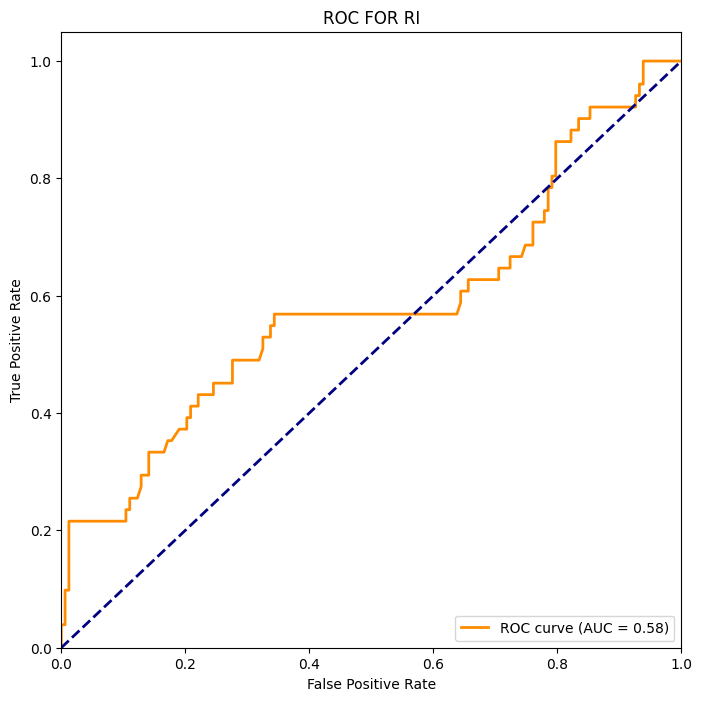

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR RI')
plt.legend(loc='lower right')
plt.show()

### Using Mg

In [34]:
glass_df.sort_values( by = 'Mg', inplace=True)
X= np.array(glass_df.Mg).reshape(-1,1)
y = glass_df.household

In [35]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[-1.8682962]]), array([-1.77247323]))

Text(0, 0.5, 'household')

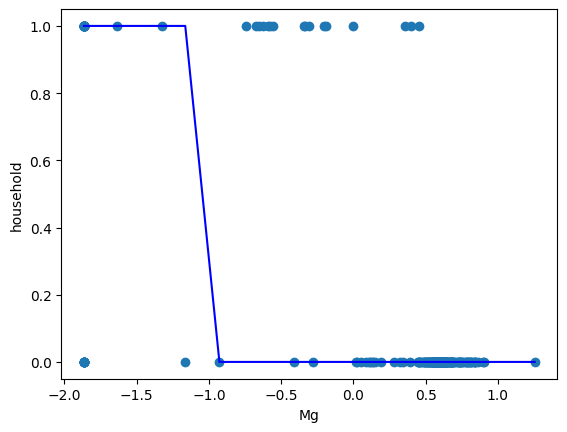

In [36]:
glass_df.sort_values( by = 'Mg', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.Mg, glass_df.household)
plt.plot(glass_df.Mg, pred, color='Blue')
plt.xlabel('Mg')
plt.ylabel('household')


In [37]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]

Text(0, 0.5, 'household')

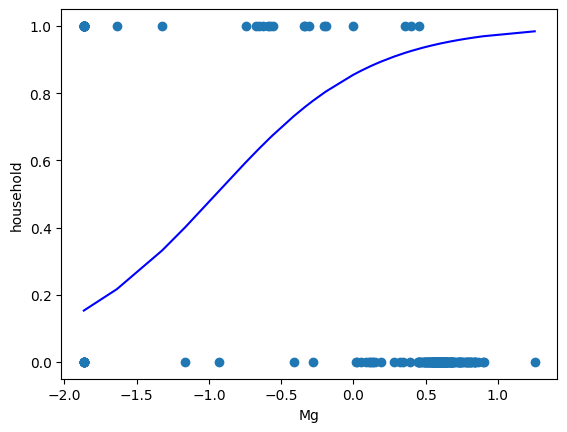

In [38]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]
# Plot the predicted probabilities.
plt.scatter(glass_df.Mg, glass_df.household)
plt.plot(glass_df.Mg, glass_df.household_pred_prob, color='Blue')
plt.xlabel('Mg')
plt.ylabel('household')


In [39]:
cm_Mg = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm_Mg

array([[153,  10],
       [ 16,  35]])

In [40]:
Accuracy_Mg = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_Mg))

Precision_Mg = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_Mg))

Recall_Mg = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_Mg))

Accuracy of the model with 0.5 threshold is 0.87850
Precision of the model with 0.5 threshold is 0.77778
Recall of the model with 0.5 threshold is 0.68627


In [41]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_Mg,
                     'Precision': Precision_Mg,
                     'Recall': Recall_Mg})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)

   Threshold  Accuracy  Precision    Recall
0        0.5  0.878505   0.777778  0.686275
1        0.1  0.878505   0.676056  0.941176
2        0.2  0.911215   0.775862  0.882353
3        0.3  0.906542   0.792453  0.823529
4        0.4  0.878505   0.765957  0.705882
5        0.6  0.883178   0.795455  0.686275
6        0.7  0.878505   0.790698  0.666667
7        0.8  0.873832   0.785714  0.647059
8        0.9  0.761682   0.000000  0.000000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


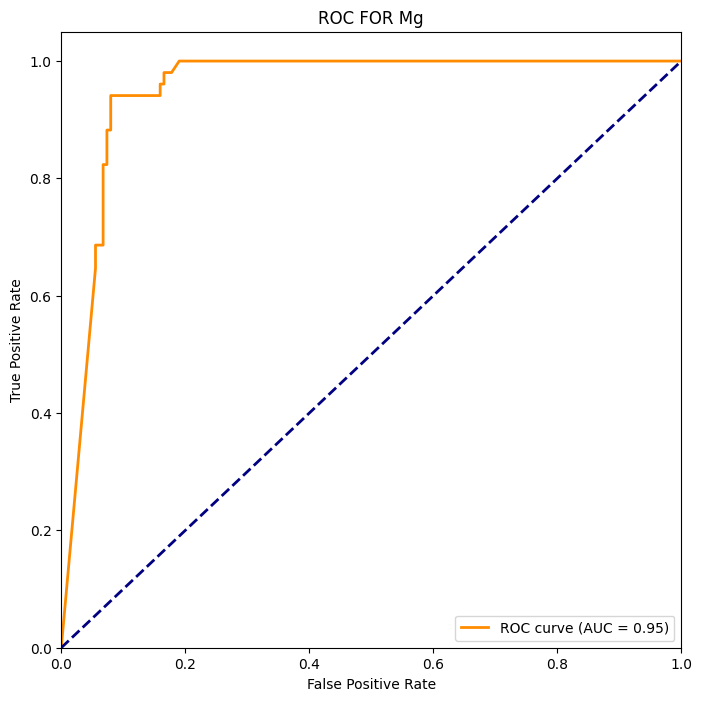

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR Mg')
plt.legend(loc='lower right')
plt.show()


### Using Si

In [43]:
glass_df.sort_values( by = 'Si', inplace=True)
X= np.array(glass_df.Si).reshape(-1,1)
y = glass_df.household

In [44]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[0.37313984]]), array([-1.19683176]))

Text(0, 0.5, 'household')

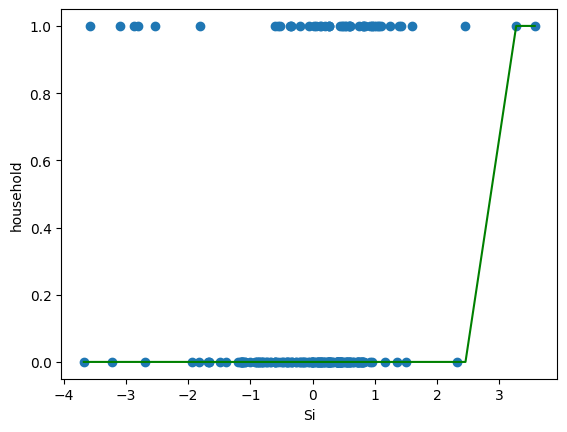

In [45]:
glass_df.sort_values( by = 'Si', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.Si, glass_df.household)
plt.plot(glass_df.Si, pred, color='green')
plt.xlabel('Si')
plt.ylabel('household')

In [46]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]

Text(0, 0.5, 'household')

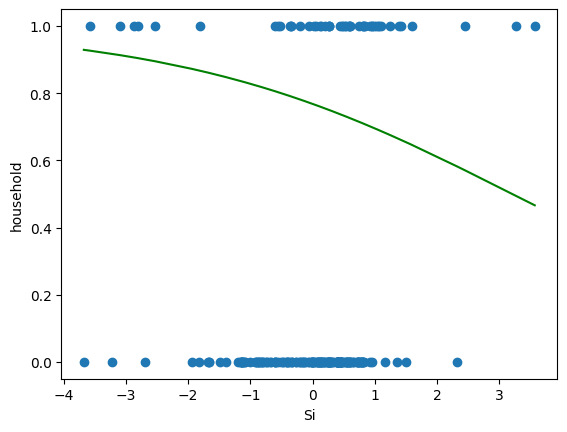

In [47]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]
# Plot the predicted probabilities.
plt.scatter(glass_df.Si, glass_df.household)
plt.plot(glass_df.Si, glass_df.household_pred_prob, color='Green')
plt.xlabel('Si')
plt.ylabel('household')


In [48]:

cm_Si = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm_Si

array([[163,   0],
       [ 49,   2]])

In [49]:
Accuracy_Si = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_Si))

Precision_Si = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_Si))

Recall_Si = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_Si))

Accuracy of the model with 0.5 threshold is 0.77103
Precision of the model with 0.5 threshold is 1.00000
Recall of the model with 0.5 threshold is 0.03922


In [50]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_Si,
                     'Precision': Precision_Si,
                     'Recall': Recall_Si})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)


   Threshold  Accuracy  Precision    Recall
0        0.5  0.771028   1.000000  0.039216
1        0.1  0.233645   0.227053  0.921569
2        0.2  0.397196   0.259259  0.823529
3        0.3  0.803738   0.736842  0.274510
4        0.4  0.771028   0.750000  0.058824
5        0.6  0.761682   0.000000  0.000000
6        0.7  0.761682   0.000000  0.000000
7        0.8  0.761682   0.000000  0.000000
8        0.9  0.761682   0.000000  0.000000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/s

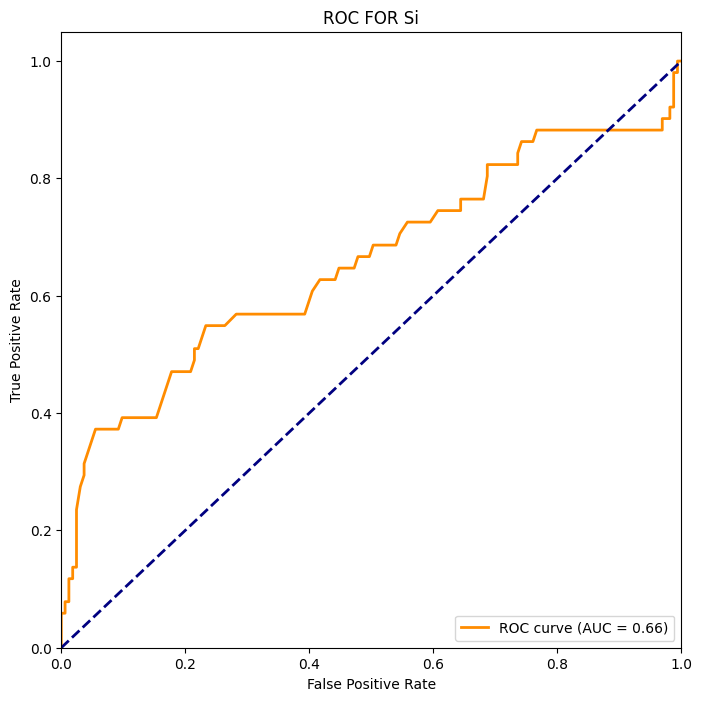

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR Si')
plt.legend(loc='lower right')
plt.show()


### Using Fe

In [52]:
glass_df.sort_values( by = 'Fe', inplace=True)
X= np.array(glass_df.Fe).reshape(-1,1)
y = glass_df.household

In [53]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[-0.62552797]]), array([-1.2585397]))

Text(0, 0.5, 'household')

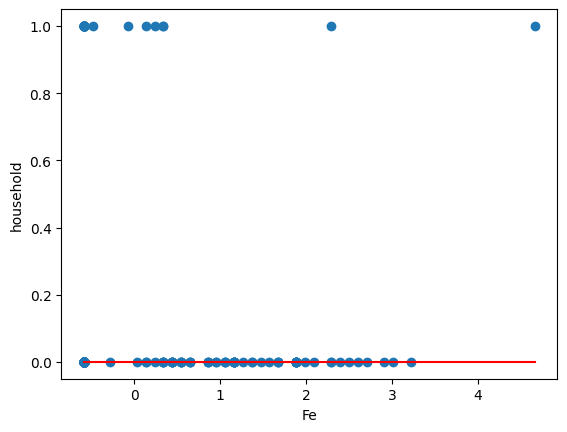

In [54]:
glass_df.sort_values( by = 'Fe', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.Fe, glass_df.household)
plt.plot(glass_df.Fe, pred, color='red')
plt.xlabel('Fe')
plt.ylabel('household')

In [55]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]

Text(0, 0.5, 'household')

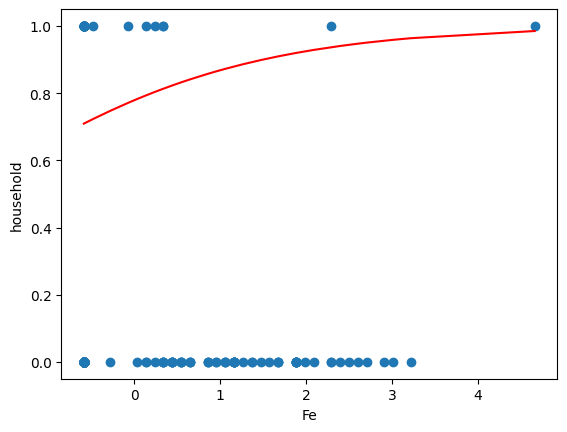

In [56]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]
# Plot the predicted probabilities.
plt.scatter(glass_df.Fe, glass_df.household)
plt.plot(glass_df.Fe, glass_df.household_pred_prob, color='red')
plt.xlabel('Fe')
plt.ylabel('household')


In [57]:
cm_Fe = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm_Fe

array([[163,   0],
       [ 51,   0]])

In [58]:
Accuracy_Fe = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_Fe))

Precision_Fe = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_Fe))

Recall_Fe = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_Fe))

Accuracy of the model with 0.5 threshold is 0.76168
Precision of the model with 0.5 threshold is 0.00000
Recall of the model with 0.5 threshold is 0.00000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_Fe,
                     'Precision': Precision_Fe,
                     'Recall': Recall_Fe})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)



   Threshold  Accuracy  Precision    Recall
0        0.5  0.761682   0.000000  0.000000
1        0.1  0.331776   0.257895  0.960784
2        0.2  0.485981   0.304636  0.901961
3        0.3  0.761682   0.000000  0.000000
4        0.4  0.761682   0.000000  0.000000
5        0.6  0.761682   0.000000  0.000000
6        0.7  0.761682   0.000000  0.000000
7        0.8  0.761682   0.000000  0.000000
8        0.9  0.761682   0.000000  0.000000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/s

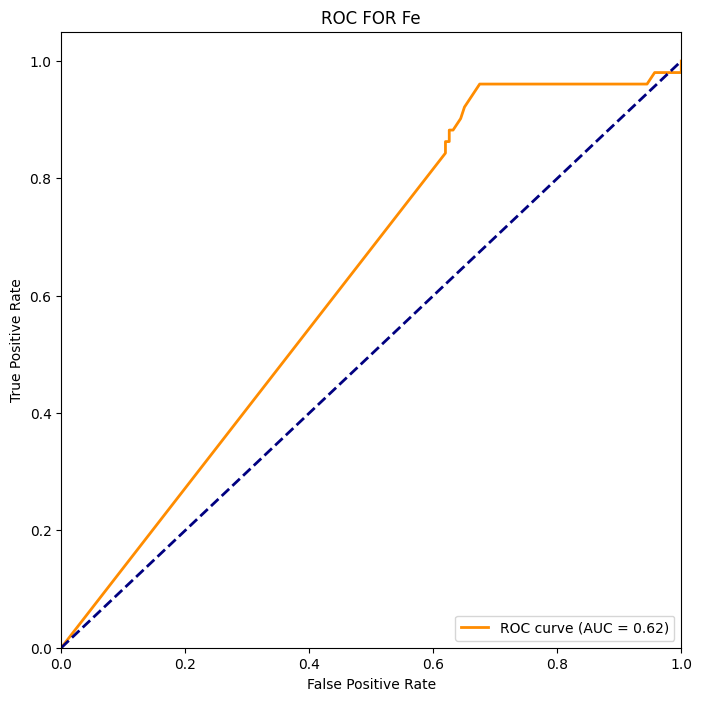

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR Fe')
plt.legend(loc='lower right')
plt.show()

### Using K

In [61]:
glass_df.sort_values( by = 'K', inplace=True)
X= np.array(glass_df.K).reshape(-1,1)
y = glass_df.household

In [62]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_


(array([[0.1069384]]), array([-1.16460084]))

Text(0, 0.5, 'household')

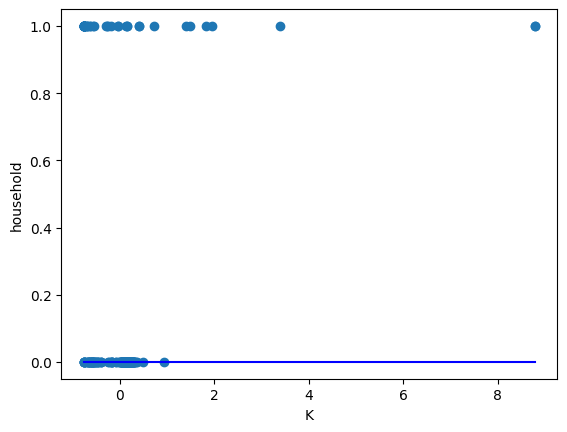

In [63]:
glass_df.sort_values( by = 'K', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.K, glass_df.household)
plt.plot(glass_df.K, pred, color='Blue')
plt.xlabel('K')
plt.ylabel('household')

In [64]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]

Text(0, 0.5, 'household')

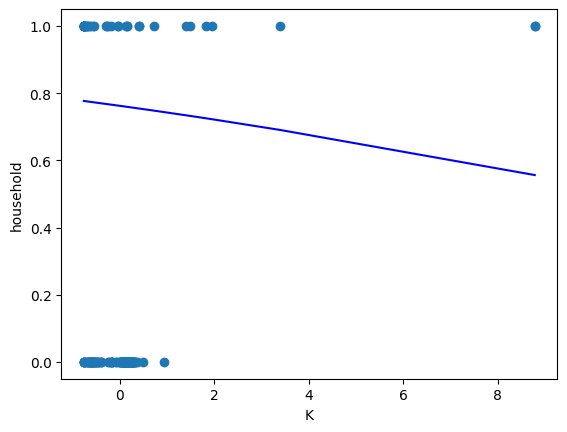

In [65]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]
# Plot the predicted probabilities.
plt.scatter(glass_df.K, glass_df.household)
plt.plot(glass_df.K, glass_df.household_pred_prob, color='Blue')
plt.xlabel('K')
plt.ylabel('household')

In [66]:
cm_K = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm_K


array([[163,   0],
       [ 51,   0]])

In [67]:
Accuracy_K = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_K ))

Precision_K = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_K))

Recall_K = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_K))


Accuracy of the model with 0.5 threshold is 0.76168
Precision of the model with 0.5 threshold is 0.00000
Recall of the model with 0.5 threshold is 0.00000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_K,
                     'Precision': Precision_K,
                     'Recall': Recall_K})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)


   Threshold  Accuracy  Precision    Recall
0        0.5  0.761682   0.000000  0.000000
1        0.1  0.238318   0.238318  1.000000
2        0.2  0.238318   0.238318  1.000000
3        0.3  0.775701   1.000000  0.058824
4        0.4  0.771028   1.000000  0.039216
5        0.6  0.761682   0.000000  0.000000
6        0.7  0.761682   0.000000  0.000000
7        0.8  0.761682   0.000000  0.000000
8        0.9  0.761682   0.000000  0.000000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/s

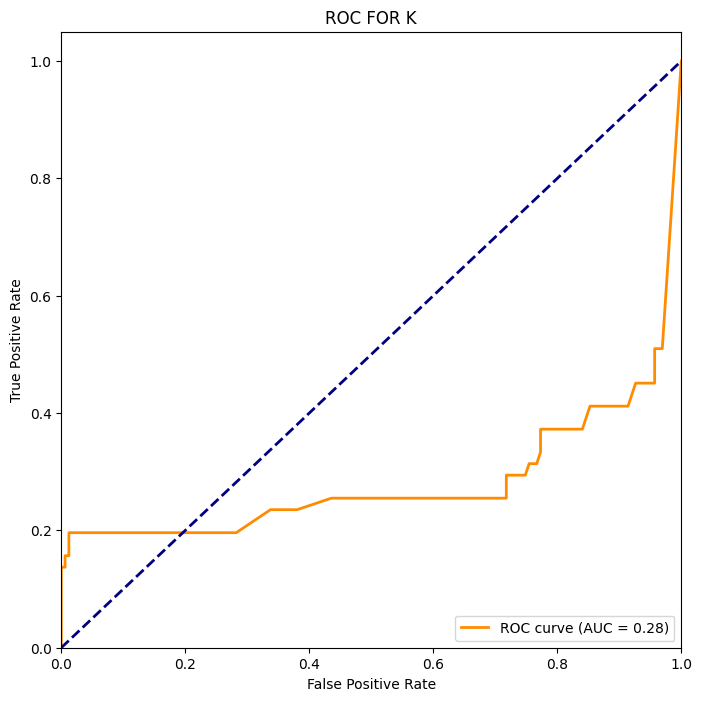

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR K')
plt.legend(loc='lower right')
plt.show()


### Using Ba

In [70]:
glass_df.sort_values( by = 'Ba', inplace=True)
X= np.array(glass_df.Ba).reshape(-1,1)
y = glass_df.household

In [71]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[1.52121318]]), array([-1.18532608]))

Text(0, 0.5, 'household')

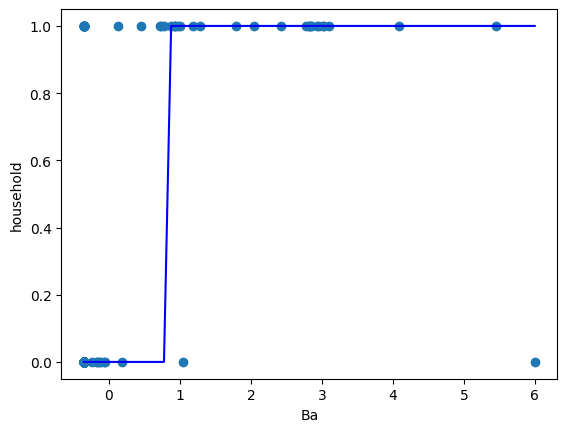

In [72]:
glass_df.sort_values( by = 'Ba', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.Ba, glass_df.household)
plt.plot(glass_df.Ba, pred, color='Blue')
plt.xlabel('Ba')
plt.ylabel('household')

Text(0, 0.5, 'household')

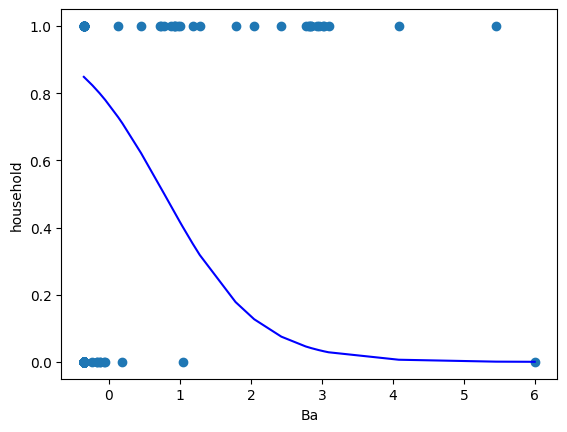

In [73]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]



logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]
# Plot the predicted probabilities.
plt.scatter(glass_df.Ba, glass_df.household)
plt.plot(glass_df.Ba, glass_df.household_pred_prob, color='Blue')
plt.xlabel('Ba')
plt.ylabel('household')


In [74]:
cm_Ba = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm_Ba


array([[161,   2],
       [ 28,  23]])

In [75]:
Accuracy_Ba = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_Ba))

Precision_Ba = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_Ba))

Recall_Ba = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_Ba))

Accuracy of the model with 0.5 threshold is 0.85981
Precision of the model with 0.5 threshold is 0.92000
Recall of the model with 0.5 threshold is 0.45098


In [76]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_Ba,
                     'Precision': Precision_Ba,
                     'Recall': Recall_Ba})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)


   Threshold  Accuracy  Precision    Recall
0        0.5  0.859813   0.920000  0.450980
1        0.1  0.238318   0.238318  1.000000
2        0.2  0.859813   0.800000  0.549020
3        0.3  0.878505   0.931034  0.529412
4        0.4  0.873832   0.928571  0.509804
5        0.6  0.836449   0.944444  0.333333
6        0.7  0.827103   0.937500  0.294118
7        0.8  0.827103   0.937500  0.294118
8        0.9  0.817757   0.928571  0.254902


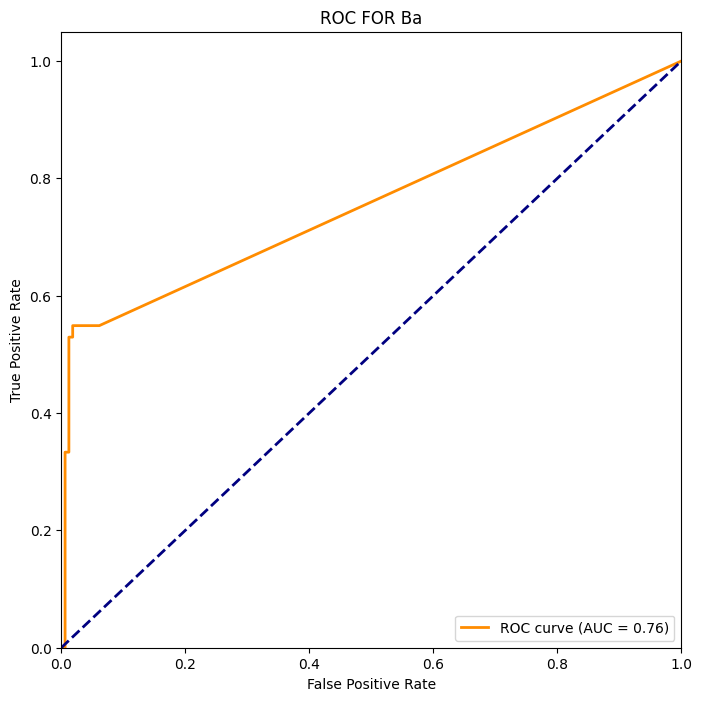

In [77]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR Ba')
plt.legend(loc='lower right')
plt.show()


### Using Ca

In [78]:
glass_df.sort_values( by = 'Ca', inplace=True)
X= np.array(glass_df.Ca).reshape(-1,1)
y = glass_df.household

In [79]:

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_


(array([[0.08918737]]), array([-1.16397043]))

Text(0, 0.5, 'household')

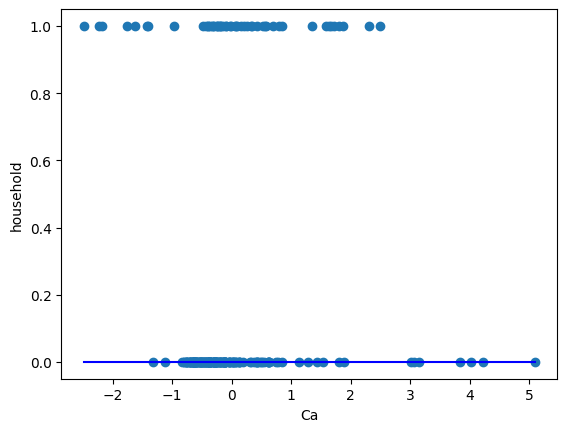

In [80]:
glass_df.sort_values( by = 'Ca', inplace=True)
# Plot the class predictions.

plt.scatter(glass_df.Ca, glass_df.household)
plt.plot(glass_df.Ca, pred, color='Blue')
plt.xlabel('Ca')
plt.ylabel('household')

In [81]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]

Text(0, 0.5, 'household')

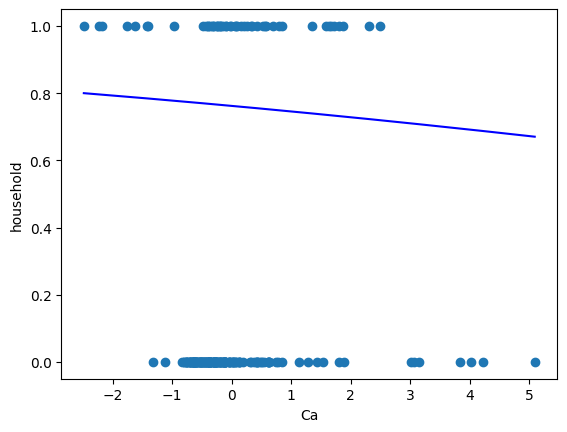

In [82]:
logreg.predict_proba(X)[:15]
# Store the predicted probabilities of class 1.
glass_df['household_pred_prob'] = logreg.predict_proba(X)[:, 0]
# Plot the predicted probabilities.
plt.scatter(glass_df.Ca, glass_df.household)
plt.plot(glass_df.Ca, glass_df.household_pred_prob, color='Blue')
plt.xlabel('Ca')
plt.ylabel('household')

In [83]:
cm_Ca = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm_Ca

array([[163,   0],
       [ 51,   0]])

In [84]:
Accuracy_Ca = accuracy_score(y_true=y, y_pred=pred)
print('Accuracy of the model with 0.5 threshold is {:.5f}'.format(Accuracy_Ca))

Precision_Ca = precision_score(y_true=y, y_pred=pred)
print('Precision of the model with 0.5 threshold is {:.5f}'.format(Precision_Ca))

Recall_Ca = recall_score(y,pred)
print('Recall of the model with 0.5 threshold is {:.5f}'.format(Recall_Ca))


Accuracy of the model with 0.5 threshold is 0.76168
Precision of the model with 0.5 threshold is 0.00000
Recall of the model with 0.5 threshold is 0.00000


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
import pandas as pd

# Your existing code...

# Create a list to store the results
results_list = []

# Add the results for the default threshold (0.5)
results_list.append({'Threshold': 0.5,
                     'Accuracy': Accuracy_Ca,
                     'Precision': Precision_Ca,
                     'Recall': Recall_Ca})

# You can loop over different thresholds if needed
thresholds = [0.1,0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Update your predictions based on the new threshold
    pred_threshold = (logreg.predict_proba(X)[:, 1] >= threshold).astype(int)

    # Calculate metrics for the new threshold
    accuracy_threshold = accuracy_score(y_true=y, y_pred=pred_threshold)
    precision_threshold = precision_score(y_true=y, y_pred=pred_threshold)
    recall_threshold = recall_score(y, pred_threshold)

    # Add the results to the list
    results_list.append({'Threshold': threshold,
                         'Accuracy': accuracy_threshold,
                         'Precision': precision_threshold,
                         'Recall': recall_threshold})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df)

   Threshold  Accuracy  Precision  Recall
0        0.5  0.761682   0.000000     0.0
1        0.1  0.238318   0.238318     1.0
2        0.2  0.238318   0.238318     1.0
3        0.3  0.742991   0.000000     0.0
4        0.4  0.761682   0.000000     0.0
5        0.6  0.761682   0.000000     0.0
6        0.7  0.761682   0.000000     0.0
7        0.8  0.761682   0.000000     0.0
8        0.9  0.761682   0.000000     0.0


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitaakenkre/Library/Python/3.9/lib/python/s

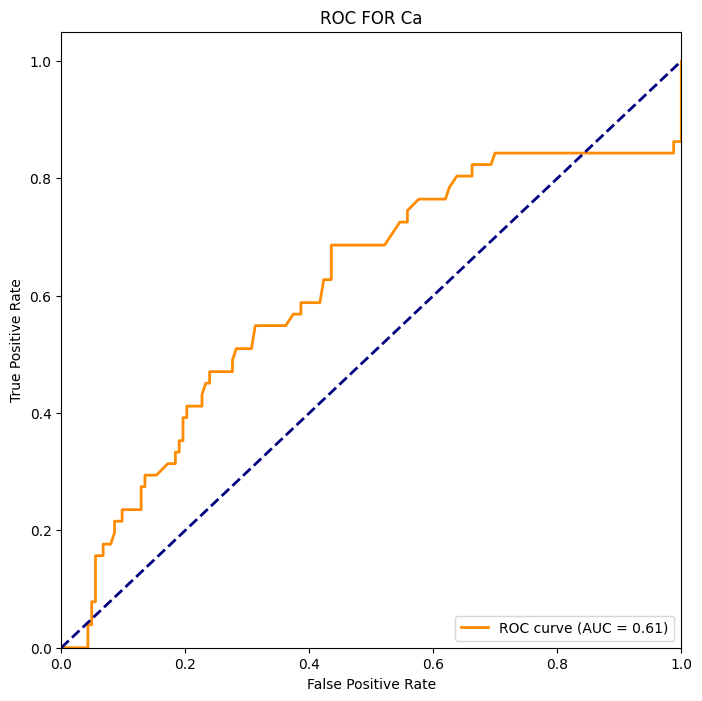

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities for class 1 stored in pred_probs
pred_probs = logreg.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, pred_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR Ca')
plt.legend(loc='lower right')
plt.show()



## CLUSTERING
#### 1. Repeat the above exercise for different values of k
#### - How do the inertia and silhouette scores change?
#### - What if you don't scale your features?
#### - Is there a 'right' k? Why or why not?


#### 2. Repeat the following exercise for food nutrients dataset

### Iris Dataset

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Clustering for k=2:
Silhouette Score for k=2: 0.6294675561906644
Inertia Score for k=2: 12.14368828157972

Clustering for k=3:
Silhouette Score for k=3: 0.5043188549150883
Inertia Score for k=3: 6.998114004826762

Clustering for k=4:
Silhouette Score for k=4: 0.44462733006506805
Inertia Score for k=4: 5.532831003081897

Clustering for k=5:
Silhouette Score for k=5: 0.3528312289766996
Inertia Score for k=5: 4.588108676866332

Clustering for k=6:
Silhouette Score for k=6: 0.35038135579352286
Inertia Score for k=6: 3.91469597718853

Clustering for k=7:
Silhouette Score for k=7: 0.33647469965212734
Inertia Score for k=7: 3.4664726425312535

Clustering for k=8:
Silhouette Score for k=8: 0.33204180436554315
Inertia Score for k=8: 3.1246151933853423

Clustering for k=9:
Silhouette Score for k=9: 0.3260634065523419
Inertia Score for k=9: 2.8152490163882877

Clustering for k=10:
Silhouette Score fo

/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

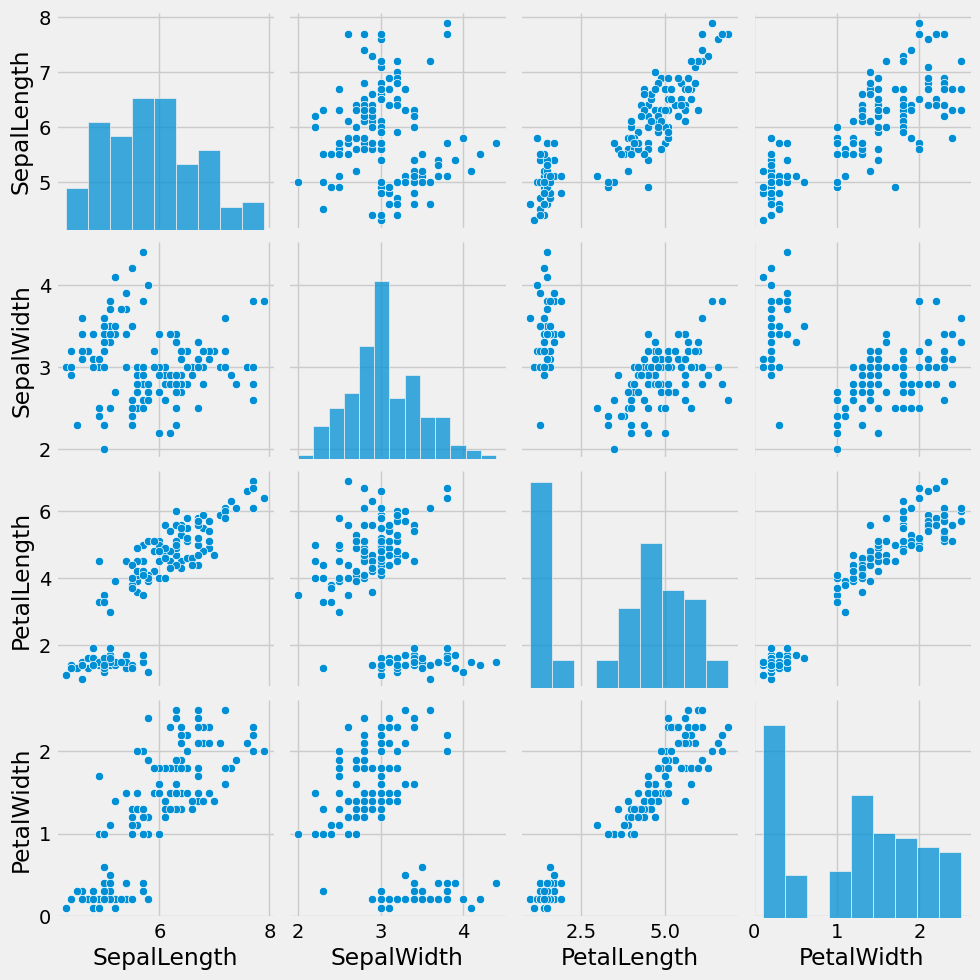

In [102]:
import pandas as pd
import seaborn as sns
from sklearn import cluster, preprocessing, metrics

# Read the CSV file
df = pd.read_csv("/Users/nikitaakenkre/Downloads/iris.csv")

# Visualize the data
print(df['Name'].value_counts())
df.head(5)
cols = df.columns[:-1]
sns.pairplot(df[cols])

# Standardize the features
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
pd.DataFrame(X_scaled, columns=cols).describe()

# Try different values of k
for k in range(2,11):  # You can adjust the range of k values as needed
    print(f"\nClustering for k={k}:")

    # Fit the KMeans model
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)

    # Get the clustering results
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    # Evaluate the clustering using silhouette score
    silhouette_score = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    print(f"Silhouette Score for k={k}: {silhouette_score}")

    # Print the inertia score
    print(f"Inertia Score for k={k}: {inertia}")

    # Add the cluster labels to the dataframe
    df[f'label_{k}'] = labels

# # Visualize the clustering results for different k values
# for k in range(2, 6):
#     cols = df.columns[:-2] + [f'label_{k}']
#     sns.pairplot(df, x_vars=cols, y_vars=cols, hue=f'label_{k}')


In [105]:
# Scaled Data

pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


#### Silhouette ranges from -1 to 1, high silhouette Score = clusters are well separated, Therefore smaller values of K-Means are better separated

#### Inertia - Low values of intertia means dense clusters, therefore higher values of K-Means are more densely packed together

#### Scaling features in k-means clustering is essential for equalizing their impact, as it prevents larger-scale features from dominating distance calculations. This ensures a meaningful distance metric and faster convergence during optimization. Scaling enhances algorithm stability, making results less dependent on feature units or scales. Overall, feature scaling in k-means contributes to more accurate and robust clustering results.

#### There is no right value of K-Mean but having a balance between the inertia and the silhouette values like in this case k = 3 is a good value to separate clusters!

### Nutrients Data set Clustering

In [130]:
# Read the text file without a header
df_nutrients = pd.read_csv("/Users/nikitaakenkre/Downloads/nutrients.txt", delimiter=r"\s+")

# Display the DataFrame
print(df_nutrients)

                   Name  Energy  Protein  Fat  Calcium  Iron
0          Braised beef     340       20   28        9   2.6
1             Hamburger     245       21   17        9   2.7
2            Roast beef     420       15   39        7   2.0
3             Beefsteak     375       19   32        9   2.6
4           Canned beef     180       22   10       17   3.7
5       Broiled chicken     115       20    3        8   1.4
6        Canned chicken     170       25    7       12   1.5
7            Beef heart     160       26    5       14   5.9
8        Roast lamb leg     265       20   20        9   2.6
9   Roast lamb shoulder     300       18   25        9   2.3
10           Smoked ham     340       20   28        9   2.5
11           Pork roast     340       19   29        9   2.5
12        Pork simmered     355       19   30        9   2.4
13          Beef tongue     205       18   14        7   2.5
14          Veal cutlet     185       23    9        9   2.7
15       Baked bluefish 

In [133]:
df_nutrients.head(5)

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7



Clustering for k=2:
Silhouette Score for k=2: 0.3785312581749529
Inertia Score for k=2: 5.069321339929418

Clustering for k=3:
Silhouette Score for k=3: 0.4331001453059117
Inertia Score for k=3: 3.366621653614521

Clustering for k=4:
Silhouette Score for k=4: 0.41725385119851643
Inertia Score for k=4: 2.558637302369486

Clustering for k=5:
Silhouette Score for k=5: 0.39457673409337274
Inertia Score for k=5: 1.7762415844992663

Clustering for k=6:
Silhouette Score for k=6: 0.36336627289599027
Inertia Score for k=6: 1.4126519905887847

Clustering for k=7:
Silhouette Score for k=7: 0.3835603046799107
Inertia Score for k=7: 1.014373100647338

Clustering for k=8:
Silhouette Score for k=8: 0.4012474375409155
Inertia Score for k=8: 0.8058956050644698

Clustering for k=9:
Silhouette Score for k=9: 0.3742329348264305
Inertia Score for k=9: 0.6885649068040774

Clustering for k=10:
Silhouette Score for k=10: 0.37101726366969257
Inertia Score for k=10: 0.5399146296259819


/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitaakenkre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

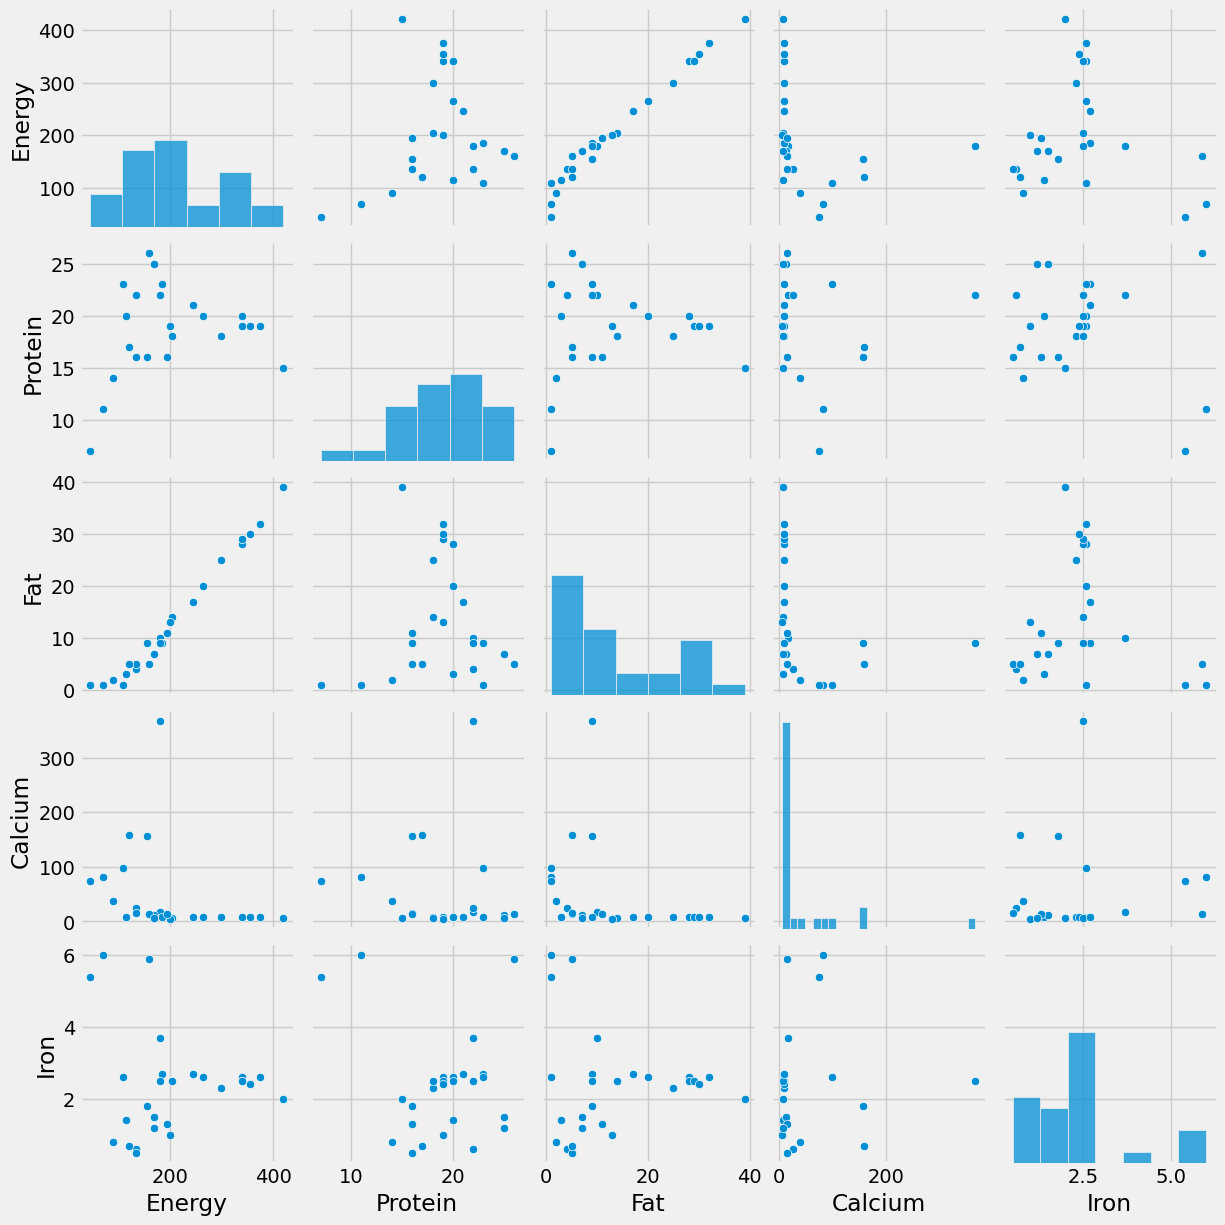

In [142]:
# Visualize the data
#print(df_nutrients['Name'].value_counts())
#df_nutrients.head(5)
cols_nutrients = df_nutrients.columns[1:]
sns.pairplot(df[cols_nutrients])

# Standardize the features
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols_nutrients])
pd.DataFrame(X_scaled, columns=cols_nutrients).describe()

# Try different values of k
for k in range(2,11):  # You can adjust the range of k values as needed
    print(f"\nClustering for k={k}:")

    # Fit the KMeans model
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)

    # Get the clustering results
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    # Evaluate the clustering using silhouette score
    silhouette_score = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    print(f"Silhouette Score for k={k}: {silhouette_score}")

    # Print the inertia score
    print(f"Inertia Score for k={k}: {inertia}")

    # Add the cluster labels to the dataframe
    df[f'label_{k}'] = labels

# # Visualize the clustering results for different k values
# for k in range(2, 6):
#     cols = df.columns[:-2] + [f'label_{k}']
#     sns.pairplot(df, x_vars=cols, y_vars=cols, hue=f'label_{k}')
